**Implementations for Figures 1,2 (in the main text), and 6 (in appendix)**

In [10]:
# ####Required liberaries (uncomment to install)
# ! pip install seaborn
# ! pip install pandas

In [11]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import math
import pandas as pd
import seaborn as sns
import ot
font = {'size'   : 12}

matplotlib.rc('font', **font)

**Figure 1**


We compare cosine similarites of samples when they are passing through layers of a random BN and vanilla netwoks. Given weights $W_\ell$ with i.i.d. Gaussian elements, representations in layers of a BN obey 
$$ H_{\ell+1} = \frac{1}{\sqrt{d}} BN(W_{\ell} H_{\ell}), \quad BN(M) = \text{diag}(M M^\top)^{-\frac{1}{2}} M$$
While for a vanilla network they obey 
$$H_{\ell+1} = W_{\ell} H_{\ell}$$




In [12]:
## Figure 1. a.
ds = [32,512] # width (d)
results=[] # all cosine similaries for indepdent runs and different networks
cols = {}
cols[ds[0]] = 'r'
cols[ds[1]] = 'b'
n = 2
num_repeat = 20 # number of indepdent runs
pivot = np.ones(2)/math.sqrt(2)
eps = 0.001
D = [] # this array containts the layer index
num_layers = 50 # number of layers 
d = 32 # width 
for k in range(num_repeat):
    Vbn = [] # absolute value of cosine similairties in different layers of a vanill network 
    Vv = [] # absolute value of cosine similairties in different layers of a vanill network 
    H = np.zeros((d,n)) # hidden representations for a BN network
    H[0,0] = 1 
    H[0,1] = 1-eps
    H[1,1] = eps
    H2 = np.zeros((d,n))# hidden representations for a vanilla networks 
    H2[0,0] = 1 
    H2[0,1] = 0
    H2[1,1] = 1
    for i in range(num_layers):
        Vbn.append(np.abs(np.dot(H[:,0],H[:,1])/(np.linalg.norm(H[:,0])*np.linalg.norm(H[:,1])))) # cosine similairty for BN
        Vv.append(np.abs(np.dot(H2[:,0],H2[:,1])/(np.linalg.norm(H2[:,0])*np.linalg.norm(H2[:,1])))) # cosine similarity for vanilla 
        D.append(i+1)
        W = np.random.randn(d,d) # random weights 
        H = W @ H 
        H2 = W @ H2
        H2 = H2
        norms = np.linalg.norm(H,axis=1) 
        H = (H.T/norms).T/math.sqrt(d)    # normalization in BN
    run_dict={'run_id': np.ones(len(Vbn),dtype=np.int8)*k,'Abs. Cos.':Vbn,'Vanilla':Vv}
    results.append(pd.DataFrame(run_dict))
results=pd.concat(results)

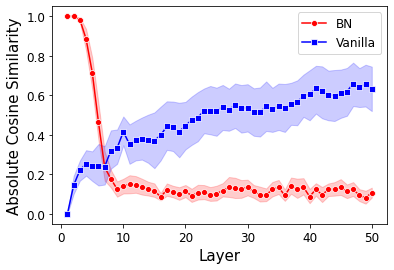

In [13]:
p1 = sns.lineplot(data=results,x=D,y="Abs. Cos.",  marker = 'o', ci=95,color='red',label='BN')
p2 = sns.lineplot(data=results,x=D,y="Vanilla",  marker='s',ci=95,color='blue',label='Vanilla')
#p1.set(xlabel='Layer',fontsize=15)
p1.set_xlabel('Layer', fontsize=15)
p1.set_ylabel('Absolute Cosine Similarity',fontsize=15)
fig = p2.get_figure()
fig.savefig('warmup.pdf',format='pdf')

**Figure 2. a.**

For hidden representations $H_\ell$, the orthogonality gap is defined as 

$$V(H_\ell) := \| H_\ell^\top H_\ell - I_n/n\|_F$$
we compute $V(H_\ell)$ across layers $\ell$

In [14]:
## Figure 2.a
ds = [32,512] # network width
n = 4 # number of samples 
num_repeat = 20 # number of indepdent runs 

I = np.eye(n) # identity matrix 
Result = [] # all the orthogonality gaps across layers for indepdent runs 
for d in ds:
    res = [] 
    num_layers = 50 
    for k in range(num_repeat):
        H = np.zeros((d,n))
        for i in range(n): 
            H[i,i] = 0.000001
        H[0,0] = 1 
        Vs = np.zeros(num_layers)
        for i in range(num_layers):
            W = np.random.randn(d,d)
            H = W @ H 
            norms = np.linalg.norm(H,axis=1)
            H = (H.T/norms).T/math.sqrt(d)
            Vs[i] = np.log(np.linalg.norm(H.T @ H-I/n))
        res.append(Vs)
    Result.append(res)
    labeli = 'd=%d' % d


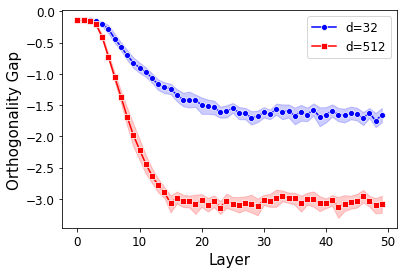

In [15]:
results=[]

D = []
for i in range(num_repeat):

    run_dict={'run_id': np.ones(num_layers,dtype=np.int8)*i,'orthogonality gap':Result[0][i],'err':Result[1][i]}
    for i in range(num_layers): 
        D.append(i)
    results.append(pd.DataFrame(run_dict))
    
results=pd.concat(results)

p1 = sns.lineplot(data=results,x=D,y="orthogonality gap", label='d=32', marker = 'o', ci=95,color='blue')
p1 = sns.lineplot(data=results,x=D,y="err",label='d=512',  marker='s',ci=95,color='red')
p1.set_xlabel('Layer', fontsize=15)
p1.set_ylabel('Orthogonality Gap',fontsize=15)
fig = p1.get_figure()
fig.savefig('gaps_depth_bn.pdf',format='pdf')

**Figure 2.b.**


We compute the average of $V(H_\ell)$ over 500 layers and plot it change for different network width

d= 16
d= 32
d= 64
d= 128
d= 256
d= 512


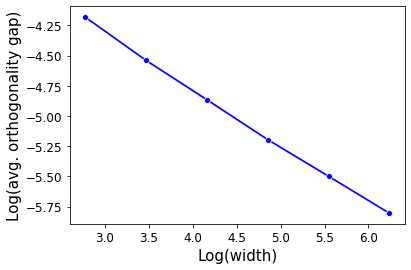

In [16]:
## Figure 1. a.
ds = [16,32,64,128,256,512] # widths
n = 4
num_repeat = 20 
I = np.eye(n) # identity matrix 
pivot = np.ones(2)/math.sqrt(2)
avgs = []
Results = []
for d in ds:
    print('d=',d)
    num_layers = 500 
    res = []
    for k in range(num_repeat):
        H = np.zeros((d,n))
        for i in range(n): 
            H[i,i] = 0.000001
        H[0,0] = 1 
        Vs = np.zeros(num_layers)
        for i in range(num_layers):
            W = np.random.randn(d,d)
            H = W @ H 
            norms = np.linalg.norm(H,axis=1)
            H = (H.T/norms).T/math.sqrt(d)
            Vs[i] = Vs[i] + np.linalg.norm(H.T @ H-I/n)/num_repeat 
        res.append(np.mean(Vs))
    Results.append(res)
arrayres = np.asarray(Results)
# ploting 
results=[]
R = []
D = []
for i in range(num_repeat):

    run_dict={'run_id': np.ones(len(ds),dtype=np.int8)*i,'log(avg. orthogonality gap)':np.log(arrayres[:,i])}
    for d in ds: 
        D.append(np.log(d))
    results.append(pd.DataFrame(run_dict))
    
results=pd.concat(results)

p1 = sns.lineplot(data=results,x=D,y="log(avg. orthogonality gap)", marker = 'o', ci=95,color='blue')
p1.set_xlabel('Log(width)', fontsize=15)
p1.set_ylabel('Log(avg. orthogonality gap)',fontsize=15)
fig = p1.get_figure()
fig.savefig('gaps_width_bn.pdf',format='pdf')

**Figure 6.**

This experiment validate the conjucture in appendix for different type of non-linearities

In [ ]:
def get_covariance(act,d,n,num_layer = 5000):
    H = np.random.randn(d,n)
    K = np.zeros((n,n))
    for i in range(num_layer):
        W = np.random.randn(d,d)
        H = W @ act(H) 
        norms = np.linalg.norm(H,axis=1)
        H = (H.T/norms).T
        M = H.T @ H/d
        V = np.linalg.norm(M-np.eye(n)/n)
        K += M/num_layer
    return K    


def sigmoid(x):
    return np.tanh(x)+1
def relu(x):
    return np.maximum(x,0)

acts = [sigmoid,relu,np.tanh,np.sin]
n = 4 
ds = [16,32,64,128,256, 512, 1024, 2048]
num_layer = 1000
AVG = []
for act in acts: 
    print(act)
    avgs = []
    for d in ds: 
        print(d)
        H = np.random.randn(d,n)
        K = get_covariance(act,d,n)
        avg =0
        for i in range(num_layer):
            W = np.random.randn(d,d)
            H = W @ act(H) 
            norms = np.linalg.norm(H,axis=1)
            H = (H.T/norms).T
            M = H.T @ H/d
        #     V = np.linalg.norm(M-np.eye(n)/n)
            V = np.linalg.norm(M-K)
            avg += V/num_layer
        avgs.append(avg)
    AVG.append(avgs)
labels = ['sigmoid','relu','tanh','sin']
for i in range(len(labels)):
    avg= AVG[i]
    plt.plot(np.log(ds),np.log(avgs),label=labels[i],LineWidth=2,marker='o')
plt.legend()
plt.xlabel('Log(d)',fontsize=15)
plt.ylabel('Log(avg. L(Q))',fontsize=15)

plt.savefig('activations.pdf',format='pdf')

<function sigmoid at 0x7fda7c9ceca0>
16
32
64
128
256
512
1024
2048
<function relu at 0x7fda7c9ce700>
16
32
64
128
256
512
1024
2048
<ufunc 'tanh'>
16
32
64
128
256
512
1024
2048


In [ ]:
for i in range(len(labels)):
    avg= AVG[i]
    plt.plot(np.log(ds),np.log(avgs),label=labels[i],LineWidth=2,marker='o')
plt.legend()
plt.xlabel('Log(d)',fontsize=15)
plt.ylabel('Log(avg. L(Q))',fontsize=15)
plt.savefig('activations.pdf',format='pdf')